#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7E4456>GRIP - TSF</font></center>

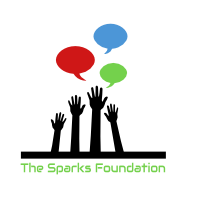

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=7E4456>Data Science and Business Analytics Internship

### <center><font color=7E4456>By </font><font color=15D77D>: </font><font color=5B1736>Shreeya Ravindra Pant-Paradkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=5B4727>Prediction using Unsupervised ML</font></center>
### <center><font color=5B4727>(Level - Beginner)</font></center>
# <center><font color=14655D>Task 2 : K-means Clustering</font></center>
### <center><font color=155E64>Problem Statement: </font><font color=5B4727>Predict the optimum number of clusters and represent it visually</font>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GitHub: 
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Date: 03-12-20 (Thursday)

### 1. Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

### 2. Reading Data

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('iris.csv', encoding='ISO 8859-1', names=names)

### 3. Data Exploration

In [3]:
df.head() #displays first five records

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() #preview of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe() #summary of data

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape #shows the amount of data

(150, 5)

In [7]:
df['class'].value_counts() #shows the categories in target vaiables

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [8]:
df.corr() #correlation

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


### 4. EDA

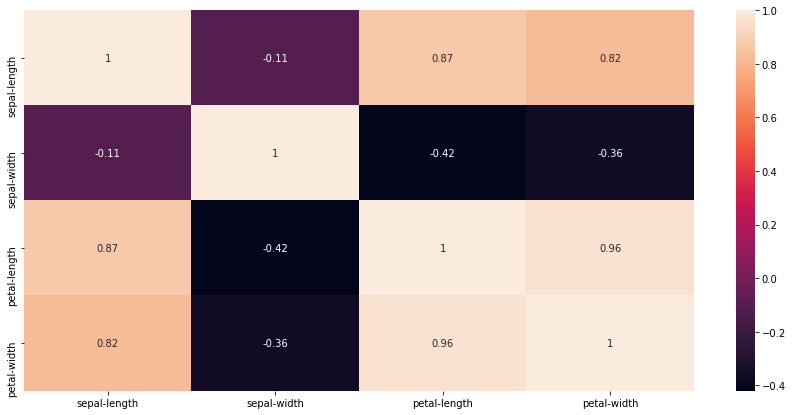

In [9]:
plt.figure(figsize=(15,7)) #heatmap
sns.heatmap(df.corr(),annot=True)

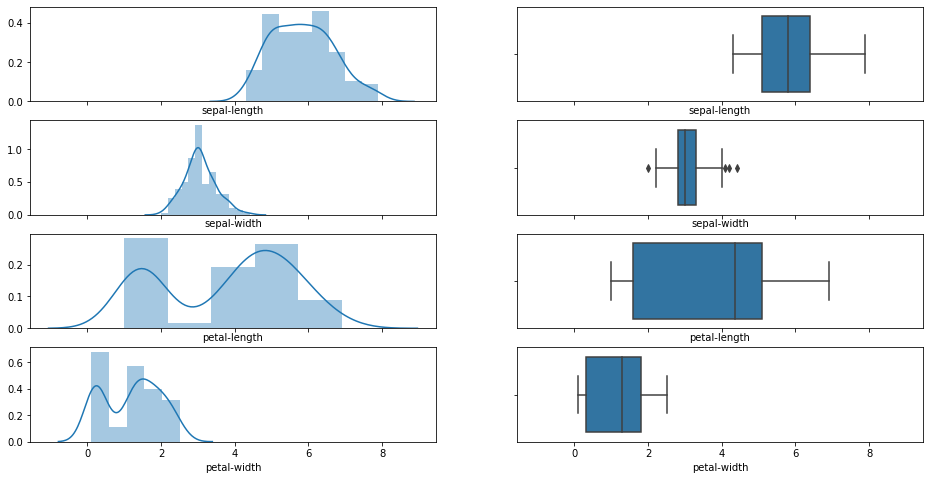

In [10]:
_, ax = plt.subplots(4, 2, sharex=True, figsize=(16, 8))
sns.distplot(df['sepal-length'],ax=ax[0][0])
sns.boxplot(df['sepal-length'],ax=ax[0][1])
sns.distplot(df['sepal-width'],ax=ax[1][0])
sns.boxplot(df['sepal-width'],ax=ax[1][1])
sns.distplot(df['petal-length'],ax=ax[2][0])
sns.boxplot(df['petal-length'],ax=ax[2][1])
sns.distplot(df['petal-width'],ax=ax[3][0])
sns.boxplot(df['petal-width'],ax=ax[3][1])
plt.show()

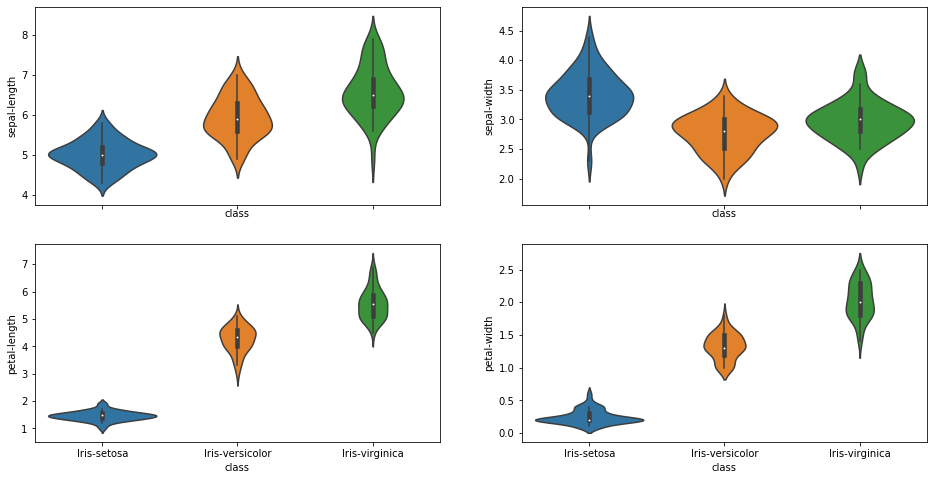

In [11]:
_, ax = plt.subplots(2, 2, sharex=True, figsize=(16, 8))
sns.violinplot(x='class', y='sepal-length', data=df, ax=ax[0,0])
sns.violinplot(x='class', y='sepal-width', data=df, ax=ax[0,1])
sns.violinplot(x='class', y='petal-length', data=df, ax=ax[1,0])
sns.violinplot(x='class', y='petal-width', data=df, ax=ax[1,1])

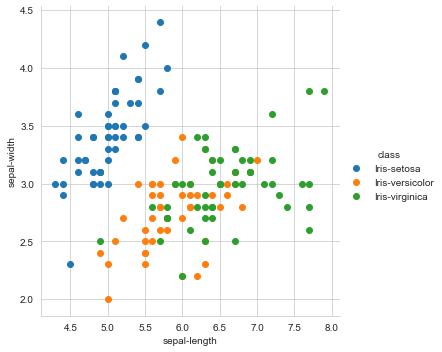

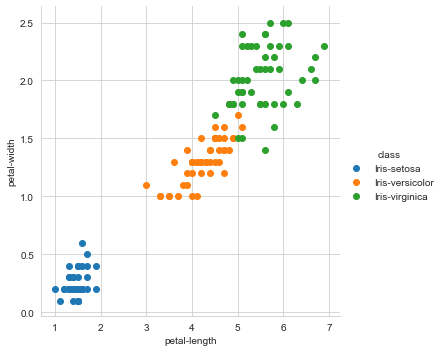

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "sepal-length","sepal-width") \
   .add_legend();
plt.show();
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "petal-length","petal-width") \
   .add_legend();
plt.show();

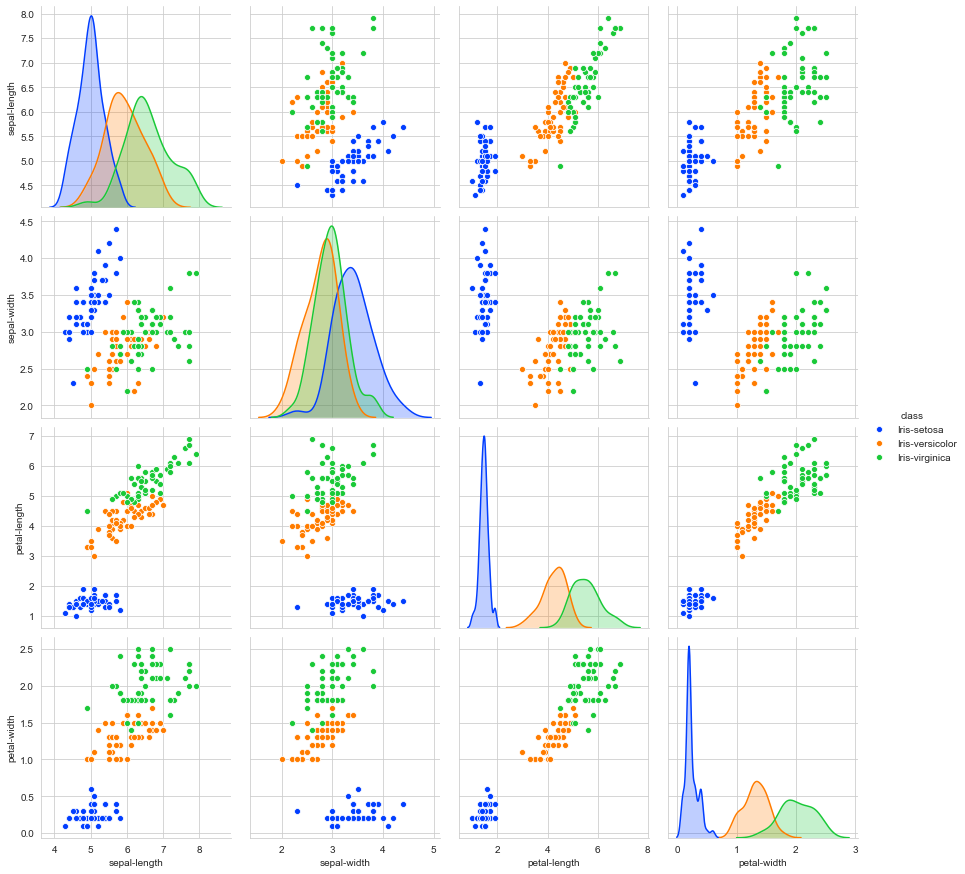

In [13]:
sns.pairplot(df,hue="class",palette="bright",diag_kind="auto",size=3) #to visualise all the attributes dependency on each other
sns.set_style("whitegrid");

It is seen that "iris-setosa" is an independent cluster in every parameter, while the other two species, "iris-versicolor" and "iris-virginica" are overlapping a bit on each other, which shows their dependency on "iris-setosa"

### 5. Data Preparation

In [14]:
X = df.drop('class',axis=1)
y = df['class'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })
y= np.array(y)

In [15]:
X.shape,y.shape

((150, 4), (150,))

### 6. Model Building

>Here we have the target variable ‘Class’. We need to remove the target variable so that this dataset can be used to work
in an unsupervised learning environment. The iloc function is used to get the features we require.
We also use '.values' function to get an array of the dataset.
**(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters)**

In [16]:
x = df.iloc[:, [0, 1, 2, 3]].values

#### Finding optimum number of clusters under K-Means Algorithm by using Elbow Method within-cluster-sum-of-squares(wcss)

In [17]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

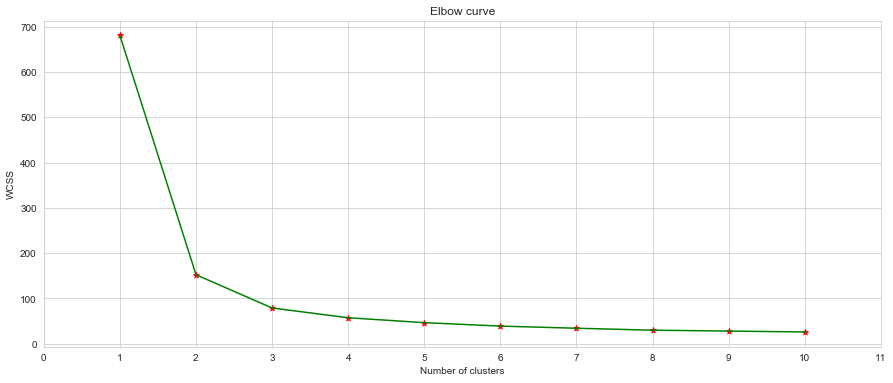

In [18]:
plt.figure(figsize=(15,6)) #Ploting Elbow Method
plt.scatter(range(1, 11), wcss,marker="*",c="red")       
plt.plot(range(1, 11), wcss,c="green")
plt.xlabel("Number of clusters")           
plt.ylabel("WCSS")
plt.xticks(range(0,12,1)) #for value of k from 0 to 11 in graph
plt.title("Elbow curve") 

> we can clearly see why it is called "the elbow mehtod" from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
**In the above graph, there is no bend after the 3rd cluster, hence, 3 is the optimum number of clusters, i.e, k=3**

### 7. Applying KMeans to the dataset

In [19]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, 
               precompute_distances = 'auto', tol = 0.0001, verbose = 0)
y_km = k_means.fit_predict(x)

In [20]:
y_km #predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### 8. Comparing Actual and Predicted values

Text(0.5, 1.0, 'Predicted')

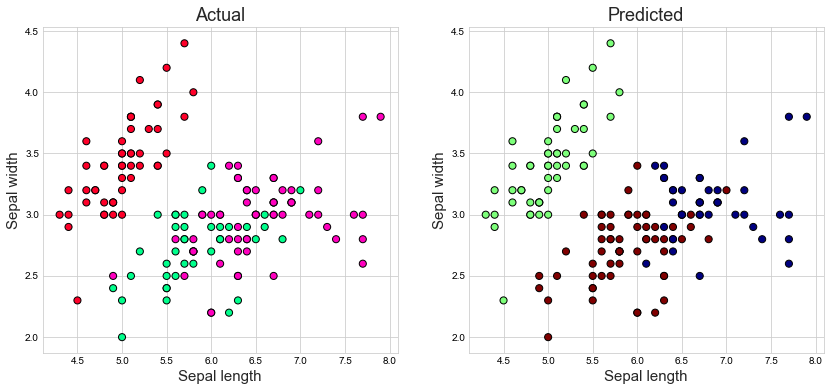

In [21]:
new_labels = k_means.labels_
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(x[:, 0], x[:, 1], c=y, cmap='gist_rainbow', edgecolor='k', s=50)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

### 9. Finding out Cluster centers

In [22]:
KModel = k_means.fit(x)
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [23]:
KModel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [24]:
KModel.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### 10. K-means Clusters

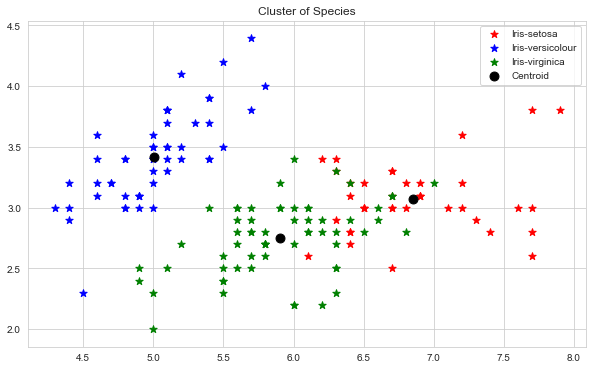

In [25]:
sns.set_style("whitegrid");
plt.figure(figsize=(10,6))
plt.scatter(x[y_km==0,0], x[y_km==0,1],s = 60,c = 'red', label = 'Iris-setosa' ,marker="*")
plt.scatter(x[y_km==1,0], x[y_km==1,1],s = 60,c = 'blue', label = 'Iris-versicolour' ,marker="*")
plt.scatter(x[y_km==2,0], x[y_km==2,1],s = 60,c = 'green', label = 'Iris-virginica' ,marker="*")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

### 11. Conclusion
##### I have successfully predicted clusters using Unsupervised ML Algorithm K-Means Clusturing and was able to evaluate the model's clustering accuracy score.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=5B1736>Thank You!</font></center>